In [1]:
# ====================================================================================================
# Nome do Arquivo : Arvore_de_Decisao.ipynb
# Autores         : Débora Leandro de Andrade e Juan Diego de Paula Rollemberg
# Curso           : PES - Colaborador Embraer
# Disciplina      : Aprendizagem de máquina I
# Professor       : George Darmilton
# Data            : 03/08/2025
# ====================================================================================================

#Esse script tem como objetivo ler o dataset selecionado e aplicar o algoritmo Árvore de Decisão.
#É realizado um treinamento considerando todos os atributos.

In [2]:
#instalação das bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#acesso ao dataset
from sklearn.datasets import fetch_openml

#classes do modelo de aprendizado
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

#funções de avaliação dos modelos
from sklearn.metrics import classification_report, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
#fetch dataset
X,y = fetch_openml(data_id=46880, return_X_y=True)

dataset = pd.concat([X,y], axis=1)

dataset.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [4]:
#definindo semente
seed=42

# Seleciona todos os campos menos a classe alvo para a variável "X".
X = dataset.iloc[:,:-1]
y = dataset.loc[:,"Air_Quality"]

#separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
print(X_train.shape)
print(X_test.shape)

(3500, 9)
(1500, 9)


GINI
MAX_DEPTH - 3 
 
              precision    recall  f1-score   support

        Good       1.00      0.97      0.98       618
   Hazardous       0.69      0.56      0.62       148
    Moderate       0.90      0.93      0.91       452
        Poor       0.69      0.77      0.73       282

    accuracy                           0.88      1500
   macro avg       0.82      0.81      0.81      1500
weighted avg       0.88      0.88      0.88      1500



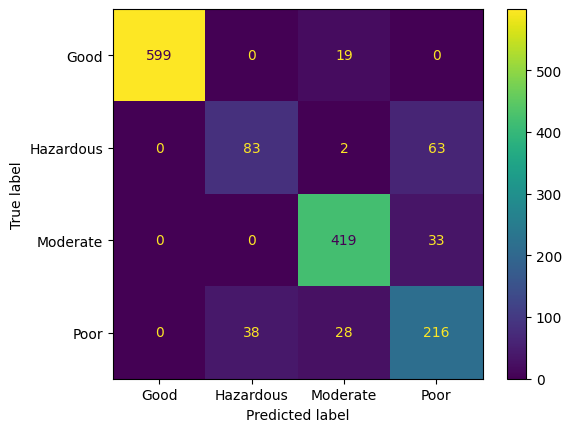



Acurácias por fold: [0.88  0.874 0.878 0.872 0.882 0.91  0.908 0.88  0.892 0.874]
Acurácia média: 0.885
K-fold: 0.885 ± 0.013




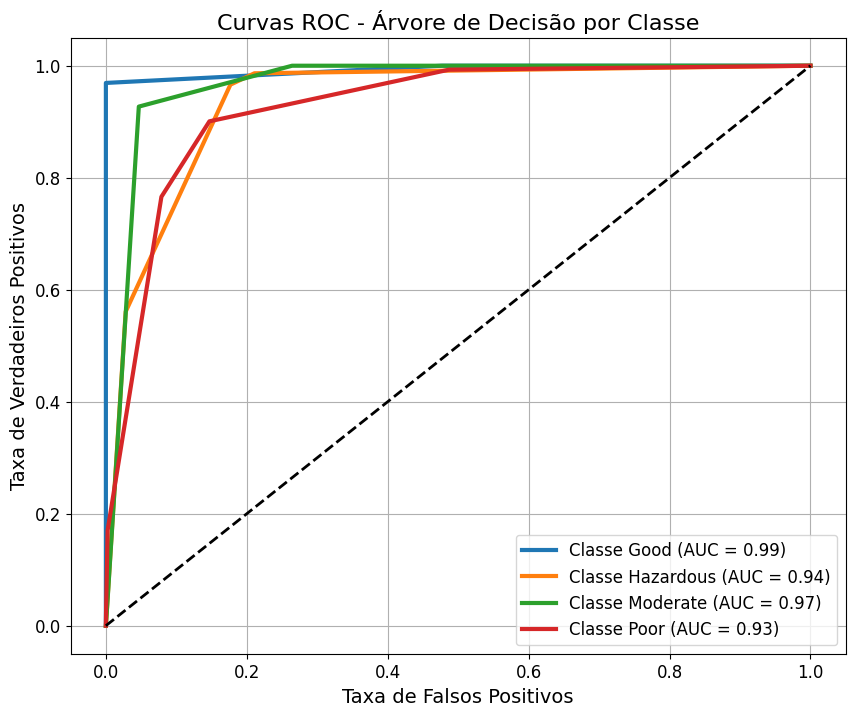

GINI
MAX_DEPTH - 4 
 
              precision    recall  f1-score   support

        Good       1.00      0.97      0.98       618
   Hazardous       0.74      0.74      0.74       148
    Moderate       0.90      0.92      0.91       452
        Poor       0.75      0.78      0.76       282

    accuracy                           0.90      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.90      0.90      0.90      1500



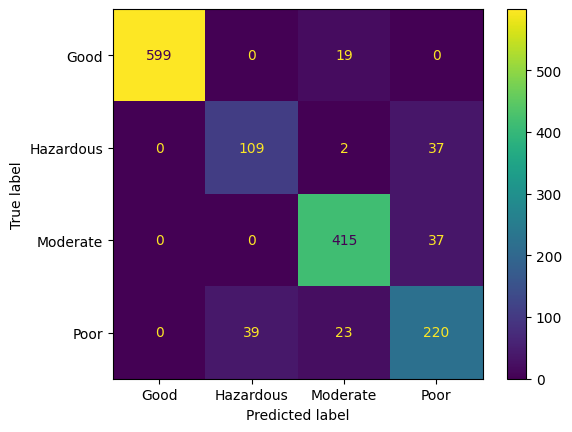



Acurácias por fold: [0.912 0.894 0.906 0.898 0.9   0.926 0.92  0.894 0.91  0.886]
Acurácia média: 0.9046
K-fold: 0.905 ± 0.012




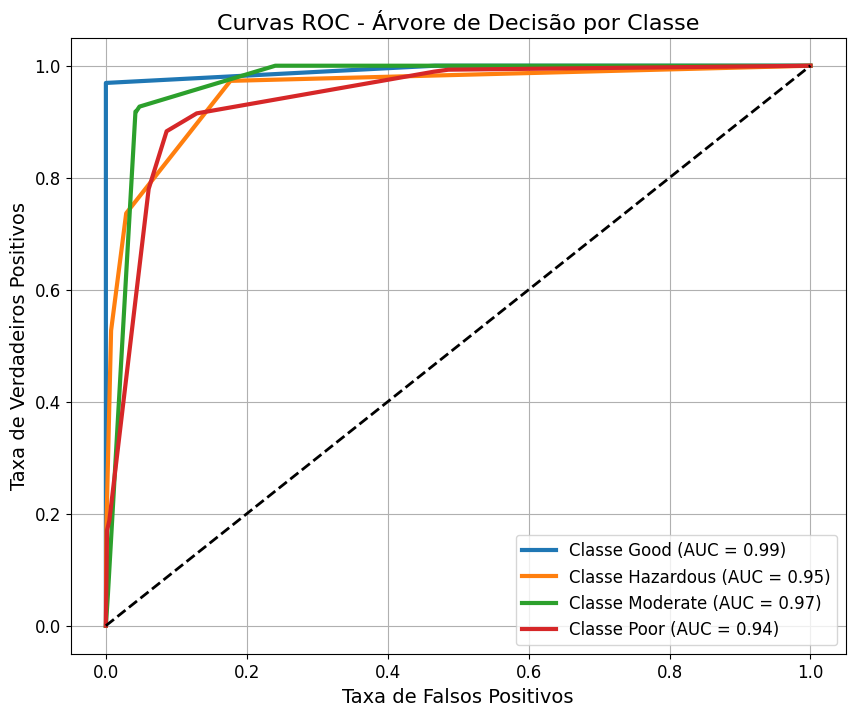

GINI
MAX_DEPTH - 5 
 
              precision    recall  f1-score   support

        Good       1.00      0.97      0.98       618
   Hazardous       0.81      0.73      0.77       148
    Moderate       0.90      0.92      0.91       452
        Poor       0.76      0.82      0.79       282

    accuracy                           0.90      1500
   macro avg       0.87      0.86      0.86      1500
weighted avg       0.91      0.90      0.90      1500



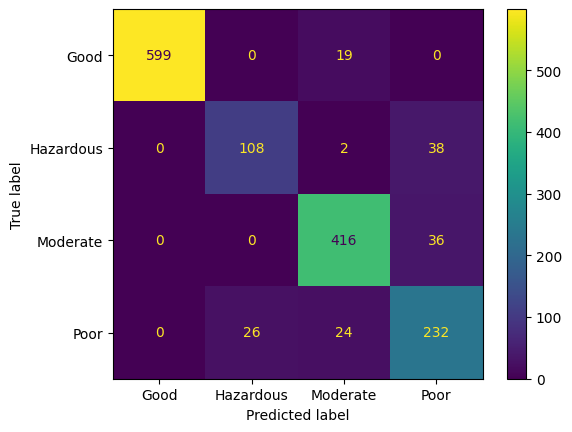



Acurácias por fold: [0.906 0.896 0.916 0.894 0.894 0.92  0.91  0.906 0.906 0.876]
Acurácia média: 0.9023999999999999
K-fold: 0.902 ± 0.012




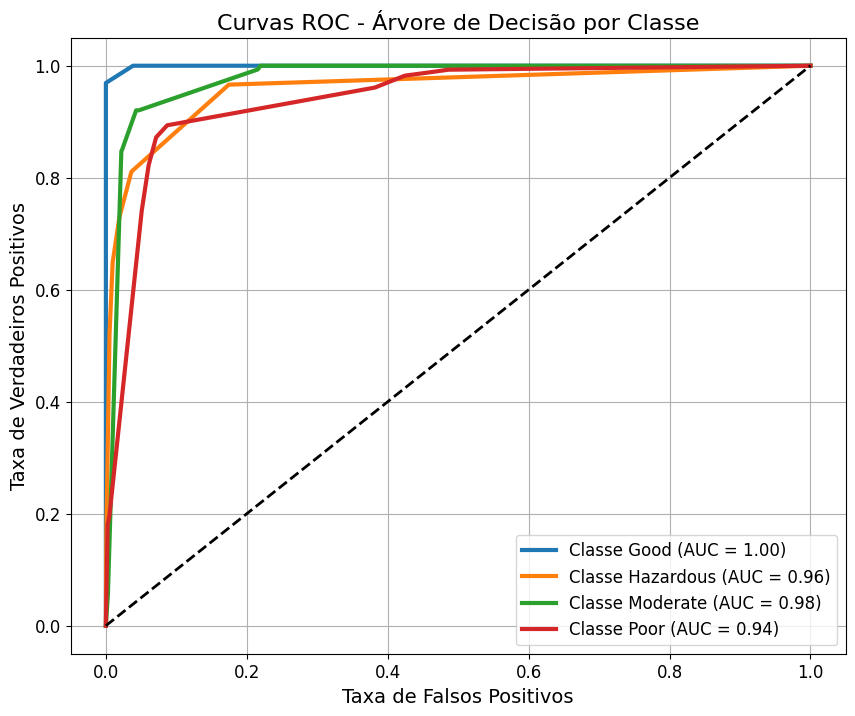

ENTROPY
MAX_DEPTH - 3 
 
              precision    recall  f1-score   support

        Good       0.99      1.00      0.99       618
   Hazardous       0.65      0.66      0.65       148
    Moderate       0.92      0.92      0.92       452
        Poor       0.72      0.71      0.71       282

    accuracy                           0.89      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.89      0.89      0.89      1500



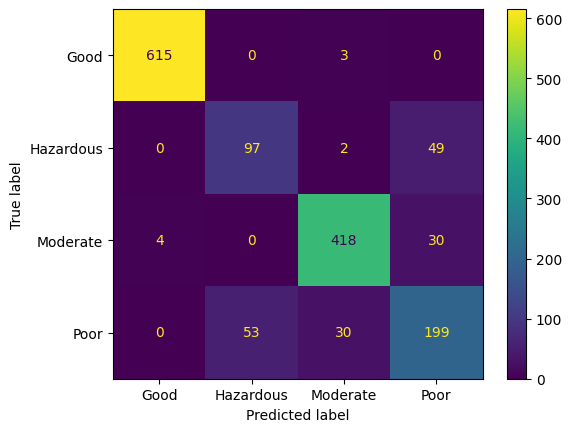



Acurácias por fold: [0.892 0.882 0.874 0.868 0.888 0.908 0.864 0.878 0.896 0.886]
Acurácia média: 0.8836
K-fold: 0.884 ± 0.013




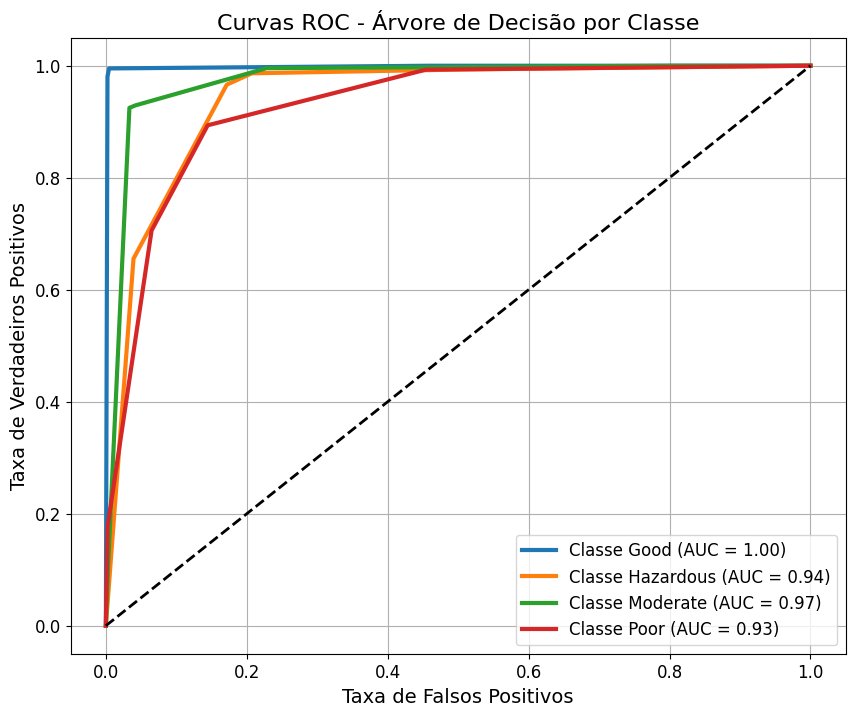

ENTROPY
MAX_DEPTH - 4 
 
              precision    recall  f1-score   support

        Good       1.00      0.99      0.99       618
   Hazardous       0.68      0.78      0.73       148
    Moderate       0.92      0.93      0.92       452
        Poor       0.77      0.71      0.73       282

    accuracy                           0.90      1500
   macro avg       0.84      0.85      0.85      1500
weighted avg       0.90      0.90      0.90      1500



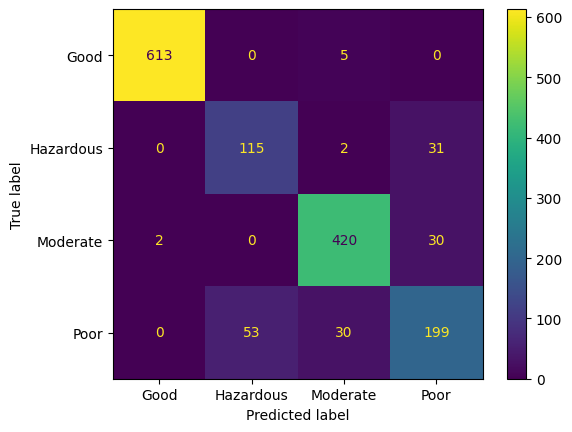



Acurácias por fold: [0.924 0.896 0.898 0.89  0.9   0.914 0.91  0.892 0.904 0.902]
Acurácia média: 0.9029999999999999
K-fold: 0.903 ± 0.010




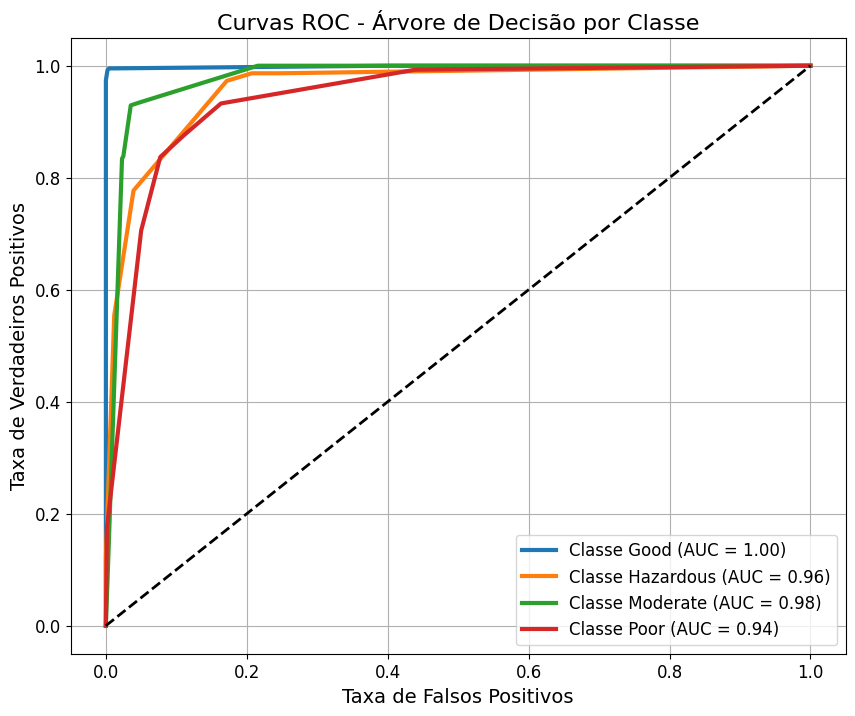

ENTROPY
MAX_DEPTH - 5 
 
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       618
   Hazardous       0.82      0.60      0.70       148
    Moderate       0.95      0.91      0.93       452
        Poor       0.72      0.86      0.78       282

    accuracy                           0.91      1500
   macro avg       0.87      0.84      0.85      1500
weighted avg       0.91      0.91      0.91      1500



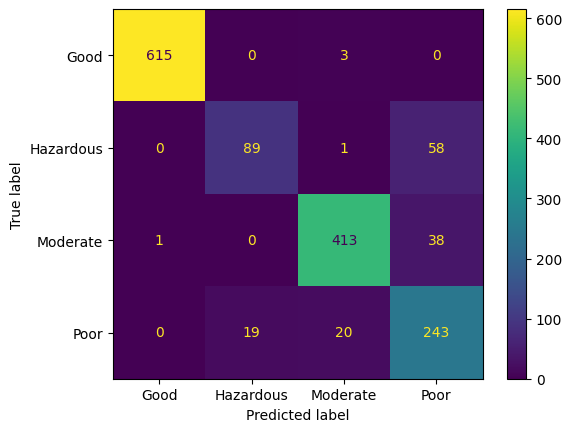



Acurácias por fold: [0.926 0.896 0.914 0.908 0.914 0.916 0.906 0.896 0.9   0.902]
Acurácia média: 0.9077999999999999
K-fold: 0.908 ± 0.009




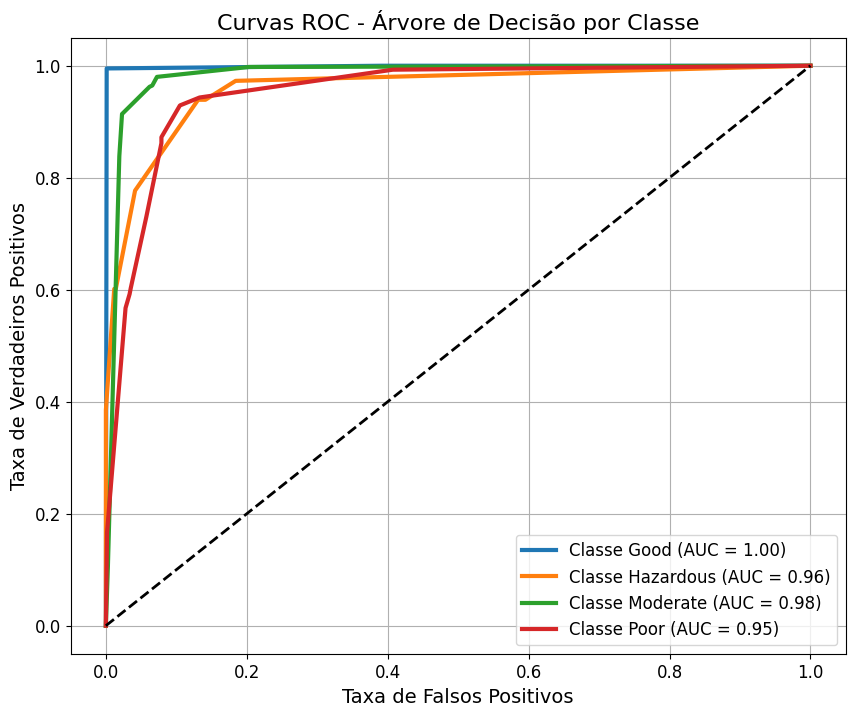

In [5]:
#loop para teste utilizando diversos criterion e max_depth
for i, criterion in enumerate(['gini', 'entropy']):

    for j, max_depth in enumerate([3,4,5]):

      print(criterion.upper())
      print(f"MAX_DEPTH - {max_depth} \n ")

      model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=seed)

      #treinando o modelo
      model.fit(X_train, y_train)

      #predição
      y_pred = model.predict(X_test)

      #relatório do classificador
      print(classification_report(y_test, y_pred))

      #calcula a matriz de confusão de acordo com os parâmetros acima
      cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
      disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

      disp_cm.plot()

      plt.show()

      print('\n')

      #10-fold cross validation
      kf = KFold(n_splits=10)

      scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

      print("Acurácias por fold:", scores)
      print("Acurácia média:", scores.mean())
      print("K-fold: %.3f ± %.3f" % (scores.mean(), scores.std()))
      print('\n')

      #calculo das curvas ROC para cada classe
      y_pred_prob = model.predict_proba(X_test)

      classes = sorted(y.unique())

      y_test_bin = label_binarize(y_test, classes=classes)

      plt.figure(figsize=(10, 8))
      for i in range(len(classes)):
          fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
          roc_auc = auc(fpr, tpr)
          plt.plot(fpr, tpr, label=f'Classe {classes[i]} (AUC = {roc_auc:.2f})', linewidth=3)

      plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
      plt.xlabel('Taxa de Falsos Positivos', fontsize=14)
      plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=14)
      plt.title('Curvas ROC - Árvore de Decisão por Classe', fontsize=16)
      plt.legend(loc='lower right',fontsize=12)
      plt.grid(True)

      plt.xticks(fontsize=12)
      plt.yticks(fontsize=12)

      plt.show()
